In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utilidades import conectar_db
from utilidades import reducir_dimensionalidad_dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
connection = conectar_db()
df_reducido = reducir_dimensionalidad_dataset()
df_reducido_estadisticas = df_reducido.iloc[:,2:]

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [67] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[11]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[11]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


# Aplicación de Clustering al dataset completo

## Funciones reutilizables

In [3]:
def obtener_dataset_segun_posicion(posicion_jugador, dataset):
    return dataset[dataset["posicion"] == posicion_jugador]

def graficar_clusters(kmeans, df):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('PC1',fontsize=15)
    ax.set_ylabel('PC2',fontsize=15)
    ax.set_title('Componentes Principales', fontsize=20)

    color_theme = np.array(['blue','green','orange','yellow'])
    ax.scatter(x=df['PC1'].values, y=df['PC2'].values, 
            c=color_theme[df['cluster']], s=50)

    # Obtener y graficar centroides
    centroids = kmeans.cluster_centers_
    ax.scatter(x=centroids[:, 0], y=centroids[:, 1], 
            marker='P', s=180, color='red', label='Centroides')

    ax.legend()
    plt.show()

def graficar_metodo_del_codo(dataset):
    wcss = []

    for i in range(1,13):
        kmeans = KMeans(n_clusters=i, max_iter=300, n_init='auto')
        kmeans.fit(dataset)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1,13), wcss)
    plt.title("Gráfico del Codo")
    plt.xlabel("Nro de clusters")
    plt.ylabel("WCSS")
    plt.show()


def graficar_analisis_silueta(dataset):
    silueta = []
    K = range(2,13)

    for i in K:
        kmeans = KMeans(n_clusters=i, max_iter=300, n_init='auto')
        kmeans.fit(dataset)
        labels = kmeans.labels_

        silueta.append(silhouette_score(dataset, labels, metric='euclidean'))

    plt.plot(K, silueta, 'bx-')
    plt.xlabel('Clusteres')
    plt.ylabel('Puntaje de la silueta')
    plt.title('Metodo de la silueta')
    plt.show()

def resultados_obtenidos_segun_posicion(posicion, dataset):
    df_segun_posicion = obtener_dataset_segun_posicion(posicion,dataset)
    return df_segun_posicion.groupby('cluster').size()


def buscar_cluster_jugador(jugador_id, dataset):
    datos_jugador_seleccionado = dataset[dataset['jugador_id'] == jugador_id]
    return datos_jugador_seleccionado['cluster'][jugador_id-1]

## K Means utilizando K = 4

In [10]:
kmeans_4 = KMeans(n_clusters=4, n_init='auto')
kmeans_4.fit(df_reducido_estadisticas)
df_reducido_completo_4 = df_reducido.copy(deep=True)
df_reducido_completo_4["cluster"] = kmeans_4.labels_
df_reducido_completo_4.head(40)

,jugador_id,posicion,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,cluster
0,1,Portero,11.497751,3.764486,3.165575,1.060991,0.004272,-0.261820,-0.372041,0.075560,0.010069,-0.267394,0.124200,3
1,2,Portero,11.832282,2.861687,2.119234,0.540186,0.321310,0.241791,-0.058057,0.016378,0.247388,0.051113,0.329455,3
2,3,Defensor,-5.667197,2.324102,4.789676,-0.481785,-0.958691,-0.520623,0.448443,-1.290895,1.595966,-0.179566,-0.923253,0
3,4,Defensor,-1.782642,-0.007719,1.185804,-0.628824,0.807810,-0.935912,0.831188,-2.275055,0.762413,0.044027,0.167801,0
4,5,Defensor,-4.295145,-0.601999,3.523056,-1.499500,2.698426,-2.249654,1.092821,-2.417658,1.258217,-0.649085,1.201400,0
5,6,Defensor,-0.591783,5.997345,-3.239799,0.304490,-0.535612,-0.943460,0.720608,0.383216,0.801850,0.887444,1.483492,2
6,7,Defensor,-2.566821,4.630466,-1.335874,1.316481,-0.790931,-2.948858,-0.302820,1.269322,0.612877,-1.150539,-0.696650,2
7,8,Defensor,-1.398874,7.149251,-1.478345,0.431958,-0.935719,-2.211924,2.786270,2.812775,0.666747,-2.150429,-0.246063,2
8,9,Defensor,-5.015046,6.899355,0.038615,2.147793,-0.673567,-0.856317,0.579776,0.683444,-0.143145,-0.213465,0.151752,2
9,10,Defensor,-5.658110,8.639655,2.053498,2.345187,-2.956320,-3.071695,-0.212536,0.951671,-0.437446,0.556555,-0.585429,2


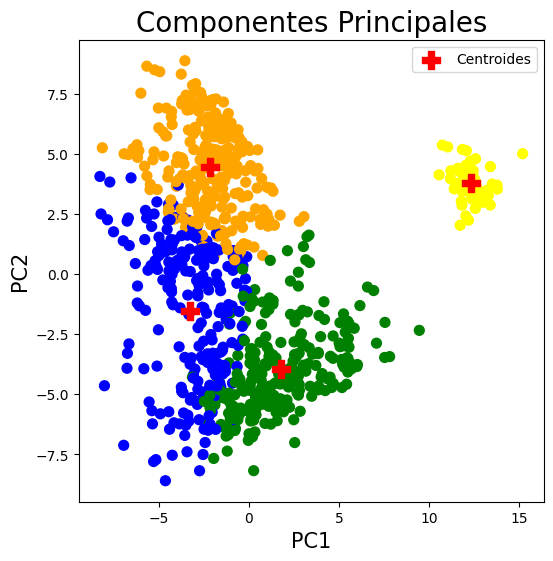

In [11]:
graficar_clusters(kmeans_4, df_reducido_completo_4)

### Análisis de resultados

In [12]:
resultados_obtenidos_segun_posicion('Portero', df_reducido_completo_4)

cluster
3    67
dtype: int64

In [13]:
resultados_obtenidos_segun_posicion('Defensor', df_reducido_completo_4)

cluster
0     91
1      6
2    160
dtype: int64

In [14]:
resultados_obtenidos_segun_posicion('Mediocampista', df_reducido_completo_4)

cluster
0    98
1    87
2    86
dtype: int64

In [15]:
resultados_obtenidos_segun_posicion('Delantero', df_reducido_completo_4)

cluster
0     38
1    163
2      3
dtype: int64

## K Means sin saber el valor de K

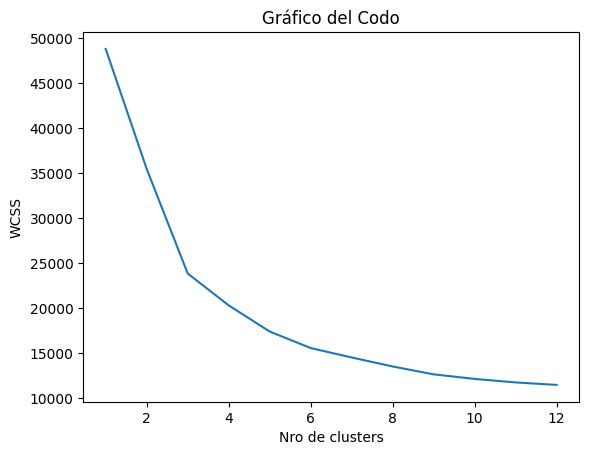

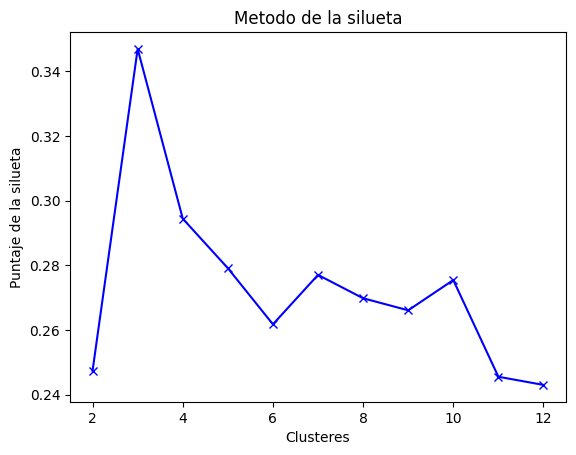

In [16]:
graficar_metodo_del_codo(df_reducido_estadisticas)

graficar_analisis_silueta(df_reducido_estadisticas)

In [17]:
kmeans_3 = KMeans(n_clusters=3, n_init='auto')
kmeans_3.fit(df_reducido_estadisticas)
df_reducido_completo_3 = df_reducido.copy(deep=True)
df_reducido_completo_3["cluster"] = kmeans_3.labels_
df_reducido_completo_3.head(40)

,jugador_id,posicion,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,cluster
0,1,Portero,11.497751,3.764486,3.165575,1.060991,0.004272,-0.261820,-0.372041,0.075560,0.010069,-0.267394,0.124200,0
1,2,Portero,11.832282,2.861687,2.119234,0.540186,0.321310,0.241791,-0.058057,0.016378,0.247388,0.051113,0.329455,0
2,3,Defensor,-5.667197,2.324102,4.789676,-0.481785,-0.958691,-0.520623,0.448443,-1.290895,1.595966,-0.179566,-0.923253,2
3,4,Defensor,-1.782642,-0.007719,1.185804,-0.628824,0.807810,-0.935912,0.831188,-2.275055,0.762413,0.044027,0.167801,2
4,5,Defensor,-4.295145,-0.601999,3.523056,-1.499500,2.698426,-2.249654,1.092821,-2.417658,1.258217,-0.649085,1.201400,2
5,6,Defensor,-0.591783,5.997345,-3.239799,0.304490,-0.535612,-0.943460,0.720608,0.383216,0.801850,0.887444,1.483492,2
6,7,Defensor,-2.566821,4.630466,-1.335874,1.316481,-0.790931,-2.948858,-0.302820,1.269322,0.612877,-1.150539,-0.696650,2
7,8,Defensor,-1.398874,7.149251,-1.478345,0.431958,-0.935719,-2.211924,2.786270,2.812775,0.666747,-2.150429,-0.246063,2
8,9,Defensor,-5.015046,6.899355,0.038615,2.147793,-0.673567,-0.856317,0.579776,0.683444,-0.143145,-0.213465,0.151752,2
9,10,Defensor,-5.658110,8.639655,2.053498,2.345187,-2.956320,-3.071695,-0.212536,0.951671,-0.437446,0.556555,-0.585429,2


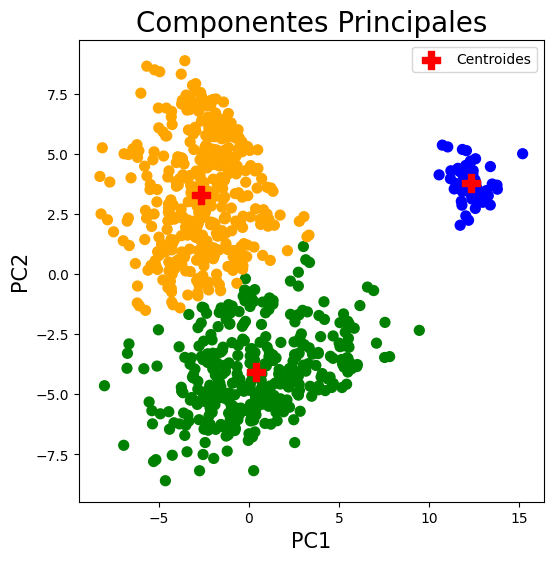

In [18]:
graficar_clusters(kmeans_3, df_reducido_completo_3)

In [19]:
resultados_obtenidos_segun_posicion('Portero', df_reducido_completo_3)

cluster
0    67
dtype: int64

In [20]:
resultados_obtenidos_segun_posicion('Defensor', df_reducido_completo_3)

cluster
1     11
2    246
dtype: int64

In [21]:
resultados_obtenidos_segun_posicion('Mediocampista', df_reducido_completo_3)

cluster
1    148
2    123
dtype: int64

In [22]:
resultados_obtenidos_segun_posicion('Delantero', df_reducido_completo_3)

cluster
1    201
2      3
dtype: int64